In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
sales = pd.read_csv("G:/Data Science Recorded Lectures/case studies/6. Pandas Case Study 4 - Python Visualizations Case Study/6. Pandas Case Study 4 - Python Visualizations Case Study/SalesData.csv")
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

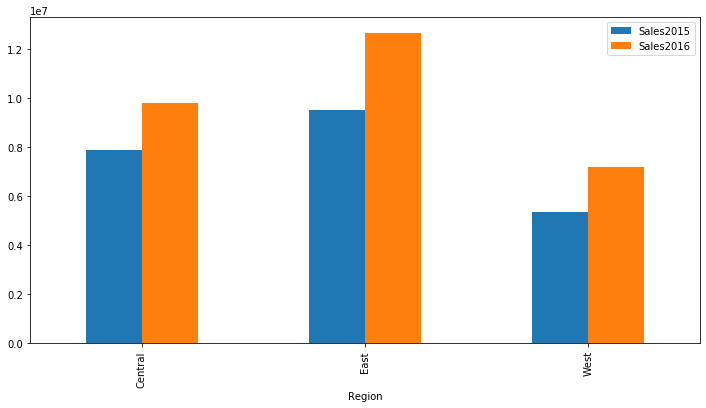

In [7]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1 = sales.groupby(['Region'])['Sales2015','Sales2016'].agg('sum')
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [10]:
sales.head(10)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54


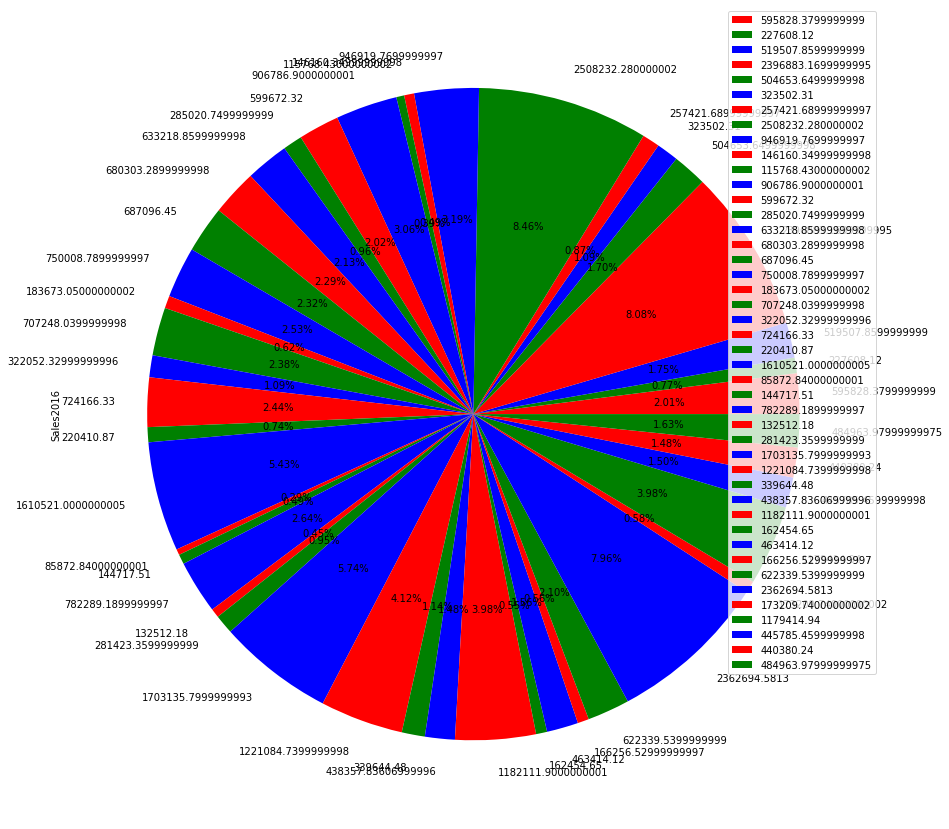

In [11]:
# sales2 = sales.groupby(['...']).aggregate({})
sales2 = sales.groupby(['State'])[['Sales2016']].sum()
#sales2 = sales2.reset_index()
sales2graph = sales2.plot(kind='pie', 
            labels=sales2['Sales2016'], 
            colors=['r', 'g', 'b'],
            autopct='%1.2f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',figsize=(15,15))

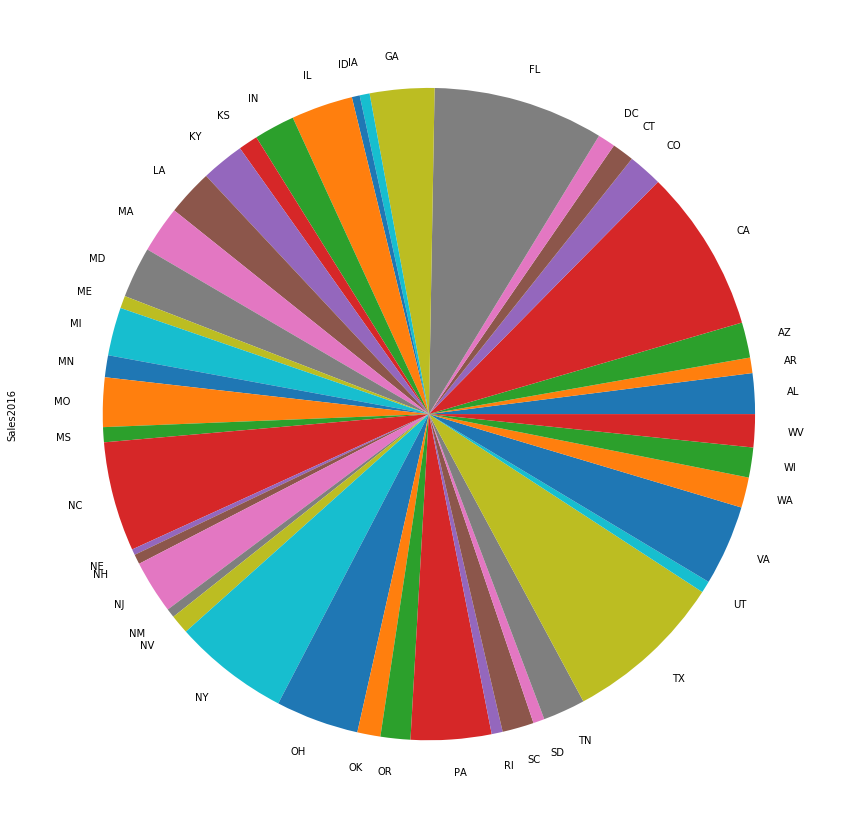

In [13]:
sales2.Sales2016.plot.pie(figsize=(15,15))

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

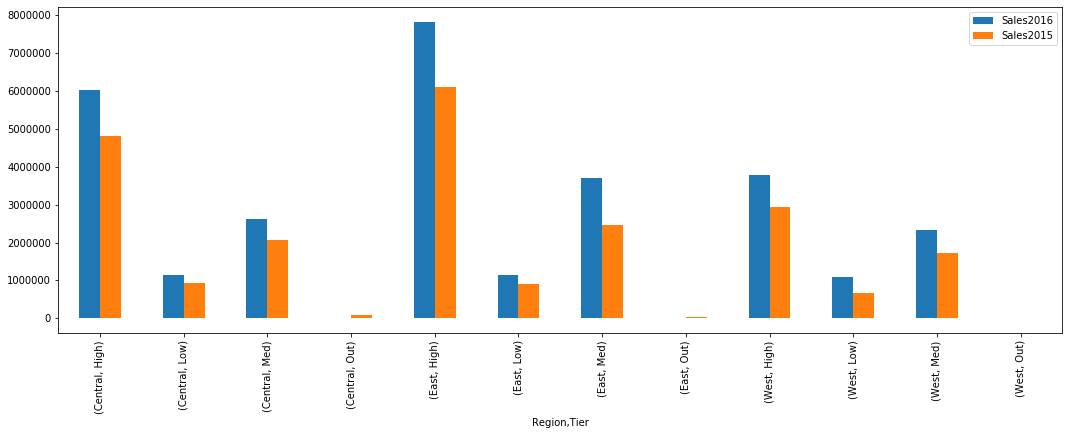

In [14]:
#sales3 = sales.groupby([]).aggregate({})
sales3 = sales.groupby(['Region','Tier'])['Sales2016','Sales2015'].sum()

sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [15]:
#sales_east = sales[sales['Region']=='East'].sort_values('Sales2015', ascending=False).head(1)
sales_east_15_16 = sales[['Region','Sales2015','Sales2016']]
sales_east = sales_east_15_16[sales_east_15_16['Region']=='East'].sort_values('Sales2016').head(1)
sales_east

,Region,Sales2015,Sales2016
1641,East,0.0,-5846.4


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [16]:
a = [['10', '1.2', '4.2'], ['15', '70', '0.03'], ['8', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])

df['que'] = np.where((df['one'] >= df['two']) & (df['one'] <= df['three'])
                     , df['one'], np.nan)
df

,one,two,three,que
0,10,1.2,4.2,10
1,15,70,0.03,NaN
2,8,5,0,NaN


In [18]:
sales_tier = sales[sales['Tier']=='High']
sales_division= sales_tier[['Division','Sales2015','Sales2016']]
sales_division['Decline'] = np.where((sales_division['Sales2015'] <= sales_division['Sales2016']), 
                                     True, False)
sales_division[sales_division['Decline'] == True].head()

,Division,Sales2015,Sales2016,Decline
5,MINUTEMEN,0.00,10525.24,True
6,MINUTEMEN,2631.31,42812.62,True
9,BIG APPLE,0.00,10994.54,True
10,BIG APPLE,9640.17,27316.66,True
17,BIG APPLE,0.00,3128.34,True


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [19]:
sales.Month.unique()

array(['Aug', 'Oct', 'Jun', 'Mar', 'Sep', 'Jul', 'Feb', 'Apr', 'Nov',
       'May', 'Dec', 'Jan'], dtype=object)

In [20]:
sales_qtr = sales[['Month','Sales2015','Sales2016']]
#sales_qtr['Qtr'] = pd.to_datetime(sales_qtr.Month).dt.quarter
#q = 'Q' + pd.to_datetime(df['Month'], format='%b').dt.quarter.rename('Qtr').astype(str)
#df = df.groupby(q).sum().reset_index()

# d = {'Jan':'Q1', 'Feb':'Q1', 'Mar':'Q1', 'Apr':'Q2', 'May':'Q2','Jun':'Q2', 'Jul':'Q3', 'Aug':'Q3',
#      'Sep':'Q3','Oct':'Q4', 'Nov':'Q4', 'Dec':'Q4'}
# sales_qtr.Month = sales_qtr.Month.map(d)

In [21]:
# sales_qtr.Month = np.where(sales_qtr.Month == 'Jan', 'Q1',
#          np.where(sales_qtr.Month  == 'Apr', 'Q2',
#          np.where(sales_qtr.Month  == 'Jul', 'Q3', None)))

sales_qtr.Month = np.where(sales_qtr.Month.isin(['Jan','Feb','Mar']), 'Q1',
                  np.where(sales_qtr.Month.isin(['Apr','May','Jun']), 'Q2',
                  np.where(sales_qtr.Month.isin(['Jul','Aug','Sep']), 'Q3',
                  np.where(sales_qtr.Month.isin(['Oct','Nov','Dec']), 'Q4', None))))

In [22]:
sales_qtr.head()

,Month,Sales2015,Sales2016
0,Q3,0.00,13208.52
1,Q4,10500.78,23114.91
2,Q2,0.00,6627.00
3,Q1,19881.00,13254.00
4,Q3,3684.48,0.00


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [23]:
sa = sales_qtr.head(10)

In [24]:
#sa[['Month','Sales2015','Sales2016']].plot(kind='bar')

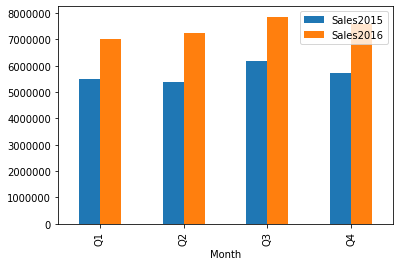

In [25]:
sales_qtr.groupby('Month').sum().plot(kind='bar')


### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

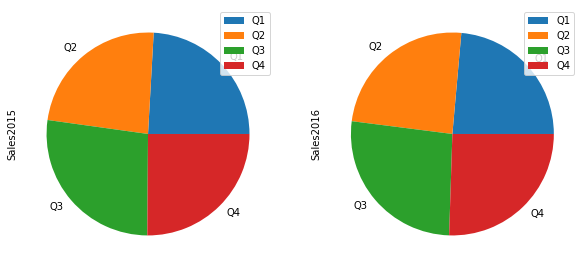

In [26]:
list_sales = ['Sales2015','Sales2016']
#list_sales = df.columns.difference(['Month']).tolist()
agg_df = sales_qtr.groupby('Month').sum()
fig,axs = plt.subplots(1,len(list_sales),figsize=(10,10))
for i,ax in enumerate(axs):
    agg_df.plot.pie(y=list_sales[i],ax=ax)
    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f392e1470>,
      dtype=object)

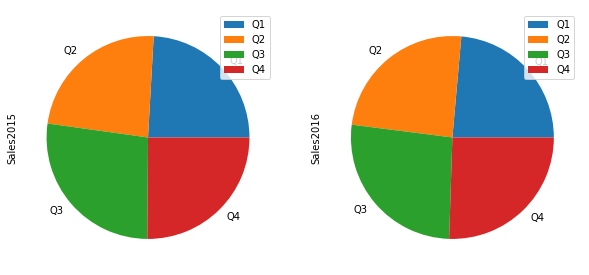

In [30]:
sales_qtr.groupby('Month').sum().plot.pie(y=list_sales,
                                   subplots=((1,len(list_sales))),
                                   figsize=(10,10))

In [27]:
sales_qtr_month = sales_qtr.groupby(['Month']).agg('sum')
sales_qtr_month

,Sales2015,Sales2016
Month,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A227B56C18>,
      dtype=object)

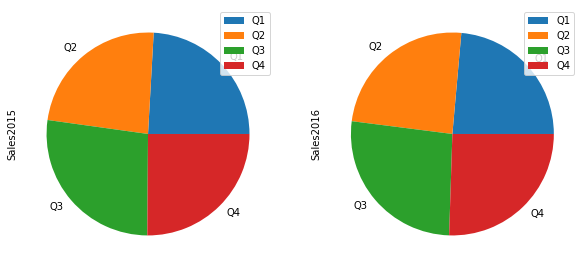

In [28]:
sales_qtr_month.plot.pie(figsize=(10,10),subplots=True)

In [35]:
# Covert percent and total to value
def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}".format(absolute)

In [36]:
df_flatten = sales_qtr_month.copy()

In [37]:
df_flatten[col].tolist()

[6997953.243999999, 7237361.1682299925, 7861546.022379992, 7567868.172759993]

AxesSubplot(0.125,0.125;0.352273x0.755) Sales2015
AxesSubplot(0.547727,0.125;0.352273x0.755) Sales2016


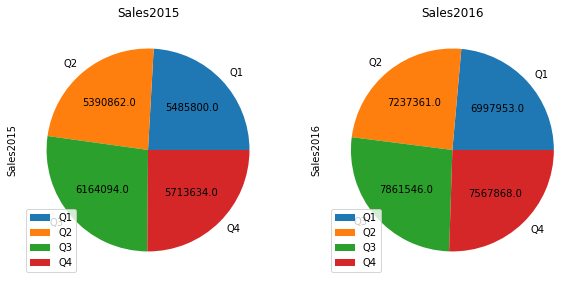

In [38]:
f, axes = plt.subplots(1,2, figsize=(10,10))
for ax, col in zip(axes, df_flatten.columns):
    print(ax,col)
    df_flatten[col].plot(kind='pie', autopct=lambda pct: func(pct, df_flatten[col].tolist()), 
                         labels=df_flatten.index,  ax=ax, title=col, fontsize=10)
    ax.legend(loc=3)

## Test Pie Chart example 

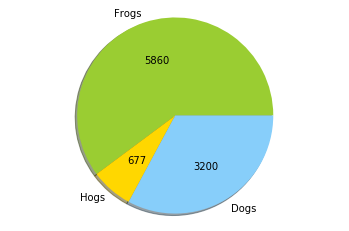

In [39]:
labels = 'Frogs', 'Hogs', 'Dogs'
sizes = np.array([5860, 677, 3200])
colors = ['yellowgreen', 'gold', 'lightskyblue']

p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="", shadow=True)

for i, a in enumerate(autotexts):
    a.set_text("{}".format(sizes[i]))

plt.axis('equal')
plt.show()